In [6]:
import random
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(10)


class MarketMaker:
    def __init__(self, lambda_, risk_aversion):
        self.lambda_ = lambda_  # Risk aversion (for inventory)
        self.risk_aversion = risk_aversion  # Risk aversion (for spread)
        self.inventory = 0  # Inventory level (initially 0)
        self.spread = 0.1  # Spread initially set to 0

    def set_spread(self, opponent_spread):
        """Set spread based on opponent's spread and their risk aversion"""
        self.spread = self.risk_aversion * opponent_spread + (
            1 - self.risk_aversion
        ) * self.spread * (1 + np.random.normal(0, 0.25))
        return self.spread

    def utility(self, flow_captured):
        """Calculate the utility based on inventory and order flow captured"""
        return -(self.lambda_ * (self.inventory**2)) + (
            self.spread * abs(flow_captured)
        )

    def adjust_inventory(self, flow_captured):
        """Adjust the inventory based on flow captured"""
        self.inventory += flow_captured


def market_make(mm1, mm2):
    """Simulate the market making process where MM1 and MM2 fight for order flow"""
    # Set spreads based on each other's strategies
    mm1_spread = mm1.set_spread(mm2.spread)
    mm2_spread = mm2.set_spread(mm1.spread)

    # Simulate random flow
    flow_size = 1  # np.random.randint(1, 10)
    flow_side = np.random.choice([-1, 1])
    flow = flow_side * flow_size

    # Determine the flow based on the spreads
    if mm1_spread < mm2_spread:
        mm1_flow = flow
        mm2_flow = 0
    elif mm2_spread < mm1_spread:
        mm1_flow = 0
        mm2_flow = flow
    else:
        # If spreads are equal, split the flow randomly
        r = random.uniform(0, 1)
        mm1_flow = r * flow
        mm2_flow = (1 - r) * flow

    # Adjust inventory based on the flow captured
    mm1.adjust_inventory(mm1_flow)
    mm2.adjust_inventory(mm2_flow)

    # Calculate the utilities for both MM1 and MM2
    mm1_utility = mm1.utility(mm1_flow)
    mm2_utility = mm2.utility(mm2_flow)

    return (
        mm1_utility,
        mm2_utility,
        mm1_spread,
        mm2_spread,
        mm1.inventory,
        mm2.inventory,
    )


def run_simulation(n_rounds, risk_aversion_1, lambda_1, risk_aversion_2, lambda_2):
    # Initialize two market makers with different risk aversions
    mm1 = MarketMaker(risk_aversion=risk_aversion_1, lambda_=lambda_1)
    mm2 = MarketMaker(risk_aversion=risk_aversion_2, lambda_=lambda_2)

    # Initialize lists to store the quantities for each round
    mm1_spreads = []
    mm2_spreads = []
    mm1_inventories = []
    mm2_inventories = []
    mm1_utilities = []
    mm2_utilities = []

    # Simulate n rounds
    for _ in range(n_rounds):
        (
            mm1_utility,
            mm2_utility,
            mm1_spread,
            mm2_spread,
            mm1_inventory,
            mm2_inventory,
        ) = market_make(mm1, mm2)

        # Store the results
        mm1_spreads.append(mm1_spread)
        mm2_spreads.append(mm2_spread)
        mm1_inventories.append(mm1_inventory)
        mm2_inventories.append(mm2_inventory)
        mm1_utilities.append(mm1_utility)
        mm2_utilities.append(mm2_utility)

    return (
        mm1_spreads,
        mm2_spreads,
        mm1_inventories,
        mm2_inventories,
        mm1_utilities,
        mm2_utilities,
    )


def plot(
    n_rounds,
    mm1_spreads,
    mm2_spreads,
    mm1_inventories,
    mm2_inventories,
    mm1_utilities,
    mm2_utilities,
):
    # Plot the results

    fig, ax = plt.subplots(2, 2, figsize=(12, 10))

    # Plot the spreads over time
    ax[0, 0].plot(range(n_rounds), mm1_spreads, label="MM1 Spread", color="blue")
    ax[0, 0].plot(range(n_rounds), mm2_spreads, label="MM2 Spread", color="red")
    ax[0, 0].set_title("Spreads over Time")
    ax[0, 0].set_xlabel("Round")
    ax[0, 0].set_ylabel("Spread")
    ax[0, 0].legend()

    # Plot the inventories over time
    ax[0, 1].plot(range(n_rounds), mm1_inventories, label="MM1 Inventory", color="blue")
    ax[0, 1].plot(range(n_rounds), mm2_inventories, label="MM2 Inventory", color="red")
    ax[0, 1].set_title("Inventories over Time")
    ax[0, 1].set_xlabel("Round")
    ax[0, 1].set_ylabel("Inventory")
    ax[0, 1].legend()

    # Plot the utilities over time
    ax[1, 0].plot(
        range(n_rounds),
        np.cumsum(mm1_utilities),
        label="MM1 Utility Cumsum",
        color="blue",
    )
    ax[1, 0].plot(
        range(n_rounds),
        np.cumsum(mm2_utilities),
        label="MM2 Utility Cumsum",
        color="red",
    )
    ax[1, 0].set_title("Utilities over Time")
    ax[1, 0].set_xlabel("Round")
    ax[1, 0].set_ylabel("Utility")
    ax[1, 0].legend()

    # Plot the difference in inventories between MM1 and MM2
    ax[1, 1].plot(
        range(n_rounds),
        [mm1 - mm2 for mm1, mm2 in zip(mm1_inventories, mm2_inventories)],
        label="Inventory Difference",
        color="green",
    )
    ax[1, 1].set_title("Inventory Difference over Time")
    ax[1, 1].set_xlabel("Round")
    ax[1, 1].set_ylabel("Inventory Difference")

    plt.tight_layout()
    plt.show()

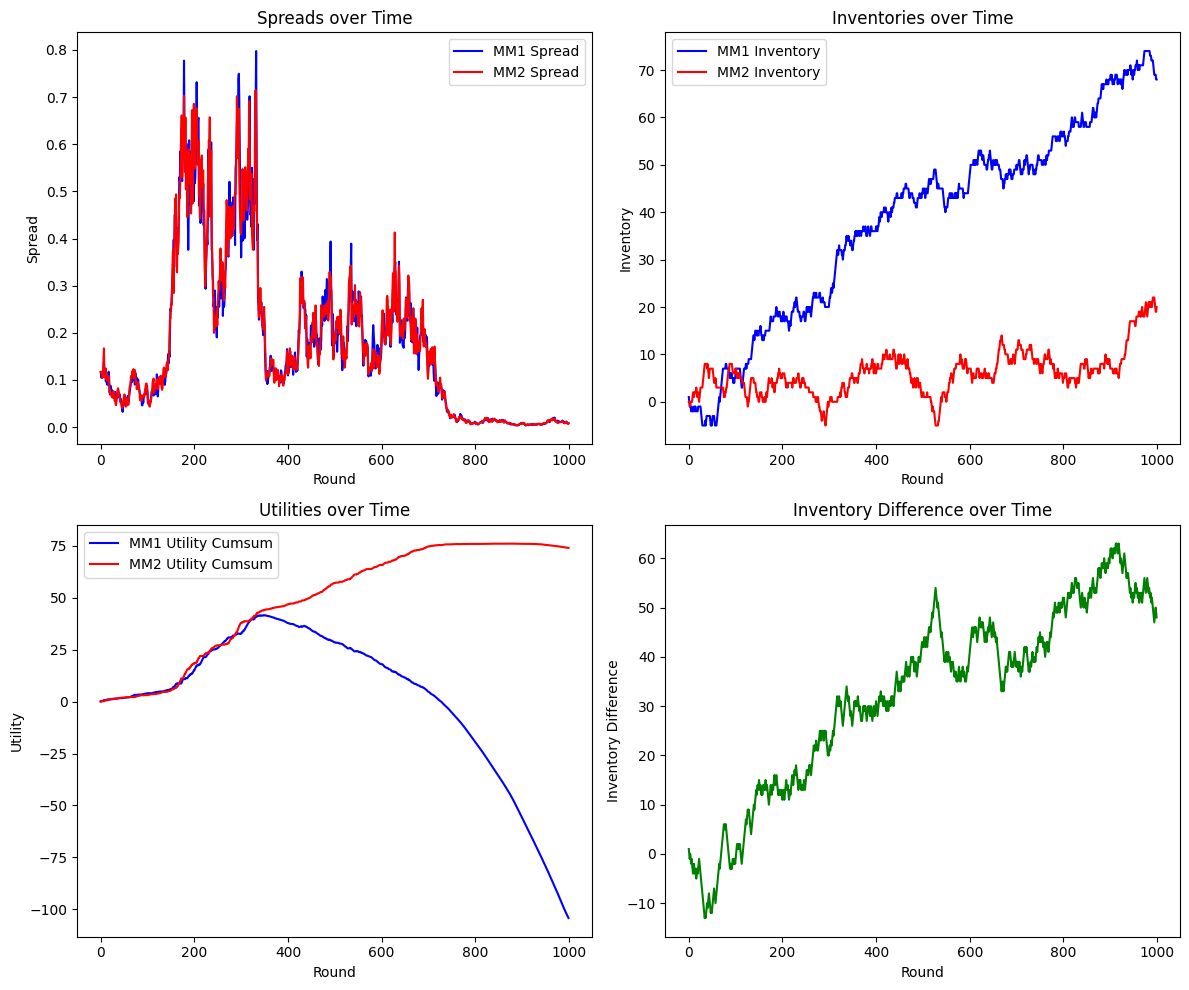

In [ ]:
# Run simulation for n rounds
n_rounds = 1000
(
    mm1_spreads,
    mm2_spreads,
    mm1_inventories,
    mm2_inventories,
    mm1_utilities,
    mm2_utilities,
) = run_simulation(
    n_rounds, risk_aversion_1=0.5, lambda_1=0.0001, risk_aversion_2=0.5, lambda_2=0.0001
)

plot(
    n_rounds,
    mm1_spreads,
    mm2_spreads,
    mm1_inventories,
    mm2_inventories,
    mm1_utilities,
    mm2_utilities,
)

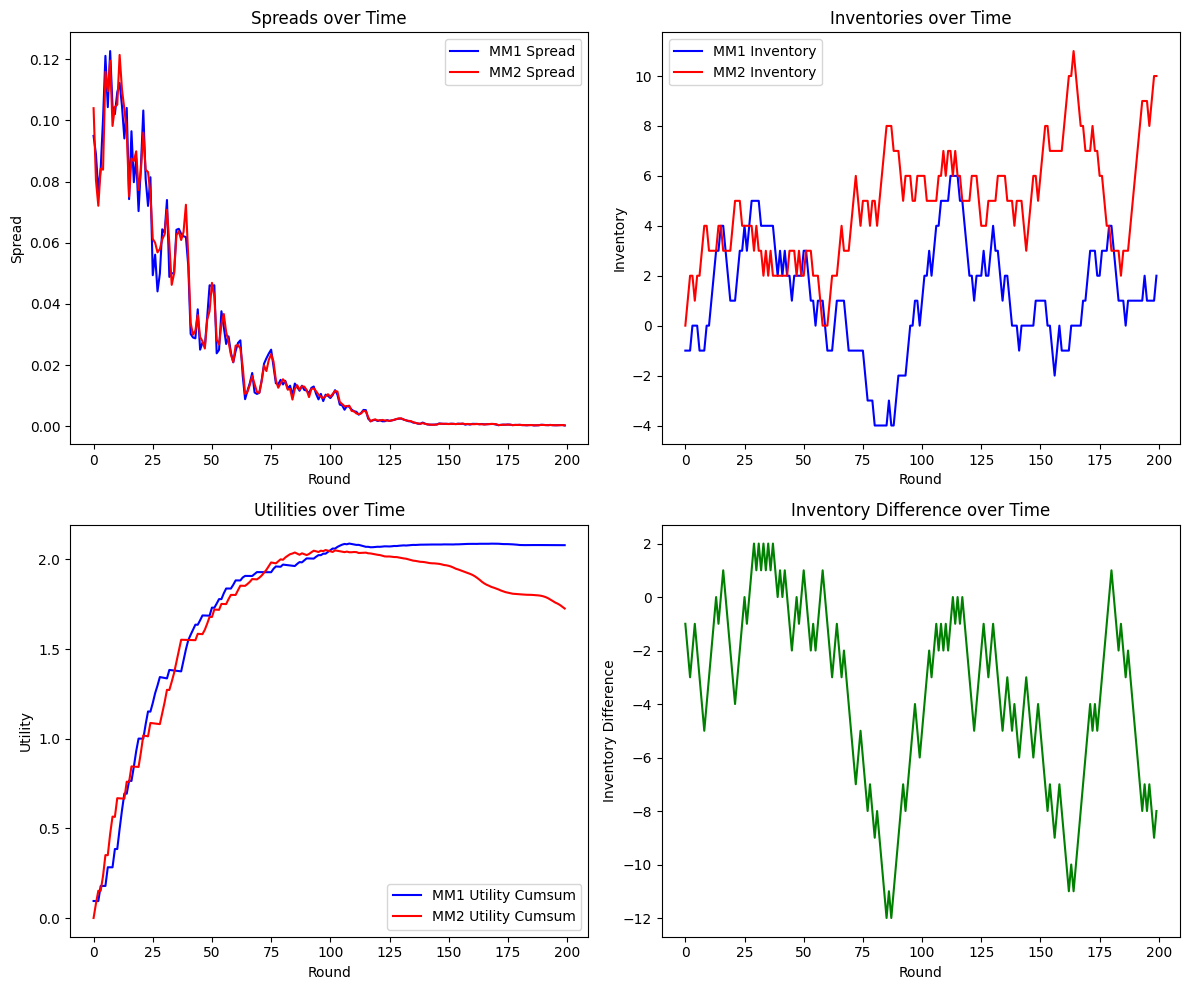

In [ ]:
# Run simulation for n rounds
n_rounds = 200
(
    mm1_spreads,
    mm2_spreads,
    mm1_inventories,
    mm2_inventories,
    mm1_utilities,
    mm2_utilities,
) = run_simulation(
    n_rounds,
    risk_aversion_1=0.25,
    lambda_1=0.0001,
    risk_aversion_2=0.75,
    lambda_2=0.0001,
)

plot(
    n_rounds,
    mm1_spreads,
    mm2_spreads,
    mm1_inventories,
    mm2_inventories,
    mm1_utilities,
    mm2_utilities,
)

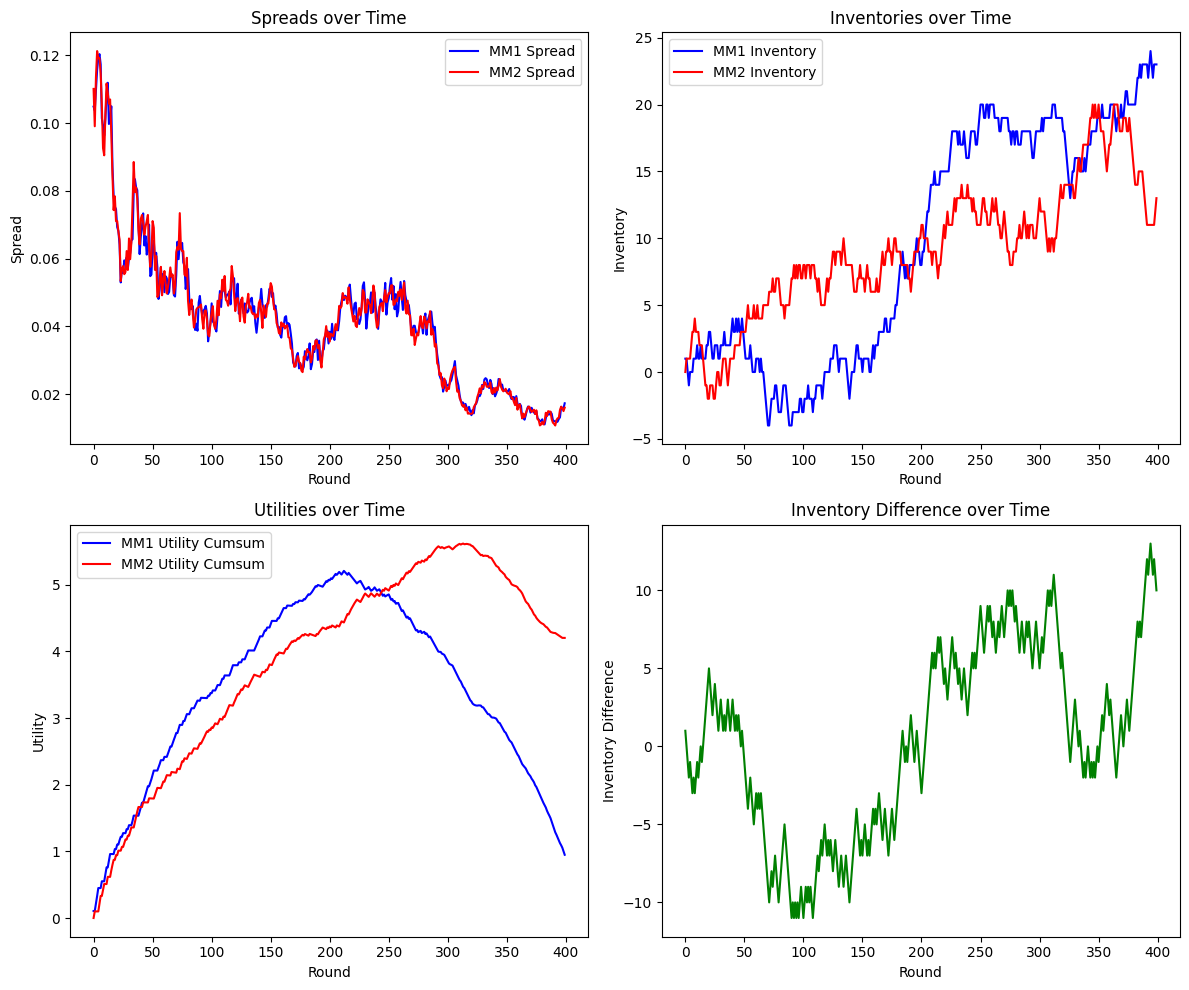

In [9]:
# Run simulation for n rounds
n_rounds = 400
(
    mm1_spreads,
    mm2_spreads,
    mm1_inventories,
    mm2_inventories,
    mm1_utilities,
    mm2_utilities,
) = run_simulation(
    n_rounds,
    risk_aversion_1=0.75,
    lambda_1=0.0001,
    risk_aversion_2=0.75,
    lambda_2=0.0001,
)

plot(
    n_rounds,
    mm1_spreads,
    mm2_spreads,
    mm1_inventories,
    mm2_inventories,
    mm1_utilities,
    mm2_utilities,
)